In [30]:
import sklearn
from tsai.basics import *
my_setup(sklearn)
import config

os              : Windows-10-10.0.19045-SP0
python          : 3.11.5
tsai            : 0.3.8
fastai          : 2.7.13
fastcore        : 1.5.29
sklearn         : 1.3.2
torch           : 2.1.1+cpu
device          : cpu
cpu cores       : 6
threads per cpu : 1
RAM             : 15.8 GB
GPU memory      : [2.0] GB


In [31]:
import pandas as pd
df=pd.read_csv('D:/project/energymeter.csv')
df=df.drop(config.ENERGY_DROP_COLOUMNS,axis=1)
print(config.ENERGY_COLOUMNS)
df.head(5)

['current_ir', 'electrical_energy', 'frequency', 'power', 'powerfactor', 'pressure', 'temperature', 'voltage_vb', 'voltage_vr', 'voltage_vy']


current_ir  electrical_energy  frequency  power  powerfactor  pressure  \
0         0.0               60.0       50.0   50.0          0.8      0.90   
1         0.4              120.0       50.0  110.0          0.9      0.00   
2         1.3              160.0       50.0  150.0          1.0      0.93   
3         1.8              380.0       50.0  370.0          1.0      1.00   
4         0.6              280.0       50.0  270.0          0.9      1.10   

   temperature  parameter_timestamp  voltage_vb  voltage_vr  voltage_vy  
0        -10.0  2023-04-04 14:14:00       210.0         0.0         212  
1          0.0  2023-04-04 14:16:00       216.0       214.0         218  
2         10.0  2023-04-04 14:18:00       222.0       220.0         224  
3         35.0  2023-04-04 10:10:00       214.0       210.0         218  
4         25.0  2023-04-04 14:24:00         0.0       216.0         219

In [32]:
df['parameter_timestamp']=pd.to_datetime(df['parameter_timestamp'],format='mixed')
datetime_col=config.ENERGY_DATETIME
freq=config.FREQUENCY
coloumns=config.ENERGY_COLOUMNS
method=config.METHOD
value=config.VALUE


preproc_pipe=sklearn.pipeline.Pipeline([
    ('shrinker',TSShrinkDataFrame()),
    ('drop_duplicates',TSDropDuplicates(datetime_col=datetime_col)),
    ('add_mts',TSAddMissingTimestamps(datetime_col=datetime_col,freq=freq)),
    ('fill_missing',TSFillMissing(columns=coloumns,method=method,value=value)),
    ],
    verbose=True)

mkdir('data', exist_ok=True,parents=True)
save_object(preproc_pipe,'data/Enerpreproc_pipe.pkl')
preproc_pipe=load_object('data/Enerpreproc_pipe.pkl')

df=preproc_pipe.fit_transform(df)

df

data directory already exists.
Pipeline saved as data\Enerpreproc_pipe.pkl
Initial memory usage: 138.92 KB 
Final memory usage  : 72.68 KB   (-47.7%)
[Pipeline] .......... (step 1 of 4) Processing shrinker, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing drop_duplicates, total=   0.0s
[Pipeline] ........... (step 3 of 4) Processing add_mts, total=   0.0s
[Pipeline] ...... (step 4 of 4) Processing fill_missing, total=   0.0s


parameter_timestamp  current_ir  electrical_energy  frequency  power  \
0    2023-02-01 10:00:50         0.0               60.0       50.0   50.0   
1    2023-02-01 11:00:50         1.2              470.0       50.0  440.0   
2    2023-02-01 12:00:50         0.6              110.0       50.0   80.0   
3    2023-02-01 13:00:50         1.2              420.0       50.0  410.0   
4    2023-02-01 14:00:50         0.0              140.0       50.0  130.0   
...                  ...         ...                ...        ...    ...   
3886 2023-07-13 08:00:50         0.0              140.0       50.0  130.0   
3887 2023-07-13 09:00:50         0.0              140.0       50.0  130.0   
3888 2023-07-13 10:00:50         0.0              140.0       50.0  130.0   
3889 2023-07-13 11:00:50         0.0              140.0       50.0  130.0   
3890 2023-07-13 12:00:50         0.0              140.0       50.0  130.0   

      powerfactor  pressure  temperature  voltage_vb  voltage_vr  voltage_vy  
0             0.8      0.90        -10.0       210.0         0.0       212.0  
1             1.0      1.05         40.0       222.0       216.0       230.0  
2             0.9      0.97         40.0       224.0       230.0       218.0  
3             1.0      0.00          0.0       225.0       211.0       230.0  
4             1.0      1.06         28.0         0.0         0.0         0.0  
...           ...       ...          ...         ...         ...         ...  
3886          1.0      1.06         28.0         0.0         0.0         0.0  
3887          1.0      1.06         28.0         0.0         0.0         0.0  
3888          1.0      1.06         28.0         0.0         0.0         0.0  
3889          1.0      1.06         28.0         0.0         0.0         0.0  
3890          1.0      1.06         28.0         0.0         0.0         0.0  

[3891 rows x 11 columns]

In [4]:
df.dtypes

parameter_timestamp    datetime64[ns]
current_ir                    float32
electrical_energy             float32
frequency                     float32
power                         float32
powerfactor                   float32
pressure                      float32
temperature                   float32
voltage_vb                    float32
voltage_vr                    float32
voltage_vy                    float64
dtype: object

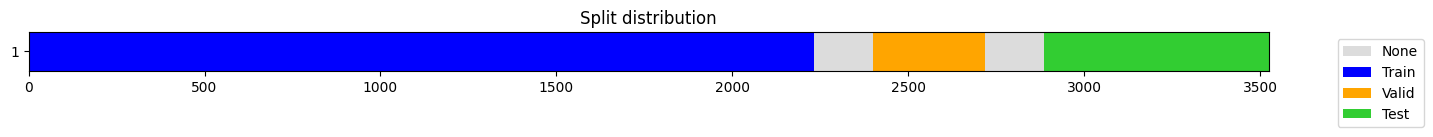

((#2233) [0,1,2,3,4,5,6,7,8,9...],
 (#319) [2400,2401,2402,2403,2404,2405,2406,2407,2408,2409...],
 (#638) [2886,2887,2888,2889,2890,2891,2892,2893,2894,2895...])

In [5]:
fcst_history= config.FCST_HISTORY
fcst_horizon= config.FCST_HORIZON
valid_size= config.VALID_SIZE
test_size= config.TEST_SIZE

splits=get_forecasting_splits(df,fcst_history=fcst_history,fcst_horizon=fcst_horizon,datetime_col=datetime_col,
                              valid_size=valid_size,test_size=test_size)

splits

In [6]:
coloumns=config.ENERGY_COLOUMNS
train_split=splits[0]


exp_pipe=sklearn.pipeline.Pipeline([
    ('scaler',TSStandardScaler(columns=coloumns)),
    ],
    verbose=True)


save_object(exp_pipe,'data/Ener_exp_pipe.pkl')
exp_pipe=load_object('data/Ener_exp_pipe.pkl')

df_scaled=exp_pipe.fit_transform(df,scaler__idxs=train_split)

df_scaled

data directory already exists.
Pipeline saved as data\Ener_exp_pipe.pkl
[Pipeline] ............ (step 1 of 1) Processing scaler, total=   0.0s


parameter_timestamp  current_ir  electrical_energy  frequency      power  \
0    2023-02-01 10:00:50   -0.035283          -8.594179        0.0  -8.850472   
1    2023-02-01 11:00:50   31.479530          35.328056        0.0  34.184769   
2    2023-02-01 12:00:50   15.722124          -3.237809        0.0  -5.540069   
3    2023-02-01 13:00:50   31.479530          29.971687        0.0  30.874365   
4    2023-02-01 14:00:50   -0.035283          -0.023987        0.0  -0.022731   
...                  ...         ...                ...        ...        ...   
3886 2023-07-13 08:00:50   -0.035283          -0.023987        0.0  -0.022731   
3887 2023-07-13 09:00:50   -0.035283          -0.023987        0.0  -0.022731   
3888 2023-07-13 10:00:50   -0.035283          -0.023987        0.0  -0.022731   
3889 2023-07-13 11:00:50   -0.035283          -0.023987        0.0  -0.022731   
3890 2023-07-13 12:00:50   -0.035283          -0.023987        0.0  -0.022731   

      powerfactor   pressure  temperature  voltage_vb  voltage_vr  voltage_vy  
0      -42.236080  -7.002370   -35.778999   22.492144   -0.036645   22.471300  
1        0.028391  -0.413303    11.321944   23.779827   26.865999   24.382834  
2      -21.103851  -3.927469    11.321944   23.994442   28.609688   23.108478  
3        0.028391 -46.536777   -26.358810   24.101749   26.243252   24.382834  
4        0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  
...           ...        ...          ...         ...         ...         ...  
3886     0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  
3887     0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  
3888     0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  
3889     0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  
3890     0.028391   0.025968     0.017718   -0.042337   -0.036645   -0.042326  

[3891 rows x 11 columns]

In [7]:
x_vars=config.ENERGY_COLOUMNS
y_vars=config.ENERGY_COLOUMNS

In [8]:
X,y=prepare_forecasting_data(df,fcst_history=fcst_history,fcst_horizon=fcst_horizon,x_vars=x_vars,y_vars=y_vars)
X.shape , y.shape

((3524, 10, 200), (3524, 10, 168))

In [9]:
learn=TSForecaster(X,y,splits=splits,
                   batch_size=16,path="models",
                   pipelines=[preproc_pipe,exp_pipe],
                   arch="InceptionTimePlus",
                   #arch_config=arch_config,
                   metrics=[mae,mape],
                   cbs=ShowGraph())

In [10]:
learn.summary()

not enough values to plot a chart


InceptionTimePlus (Input shape: 16 x 10 x 200)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 32 x 200       
Conv1d                                    320        True      
Conv1d                                    39936      True      
Conv1d                                    19456      True      
Conv1d                                    9216       True      
MaxPool1d                                                      
____________________________________________________________________________
                     16 x 32 x 200       
Conv1d                                    320        True      
____________________________________________________________________________
                     16 x 128 x 200      
Concat                                                         
BatchNorm1d                               256        True      
ReLU                                                           
_________________________________

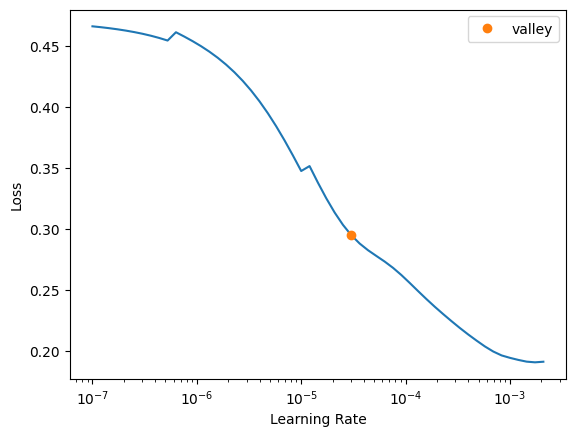

In [11]:
lr_max=learn.lr_find().valley

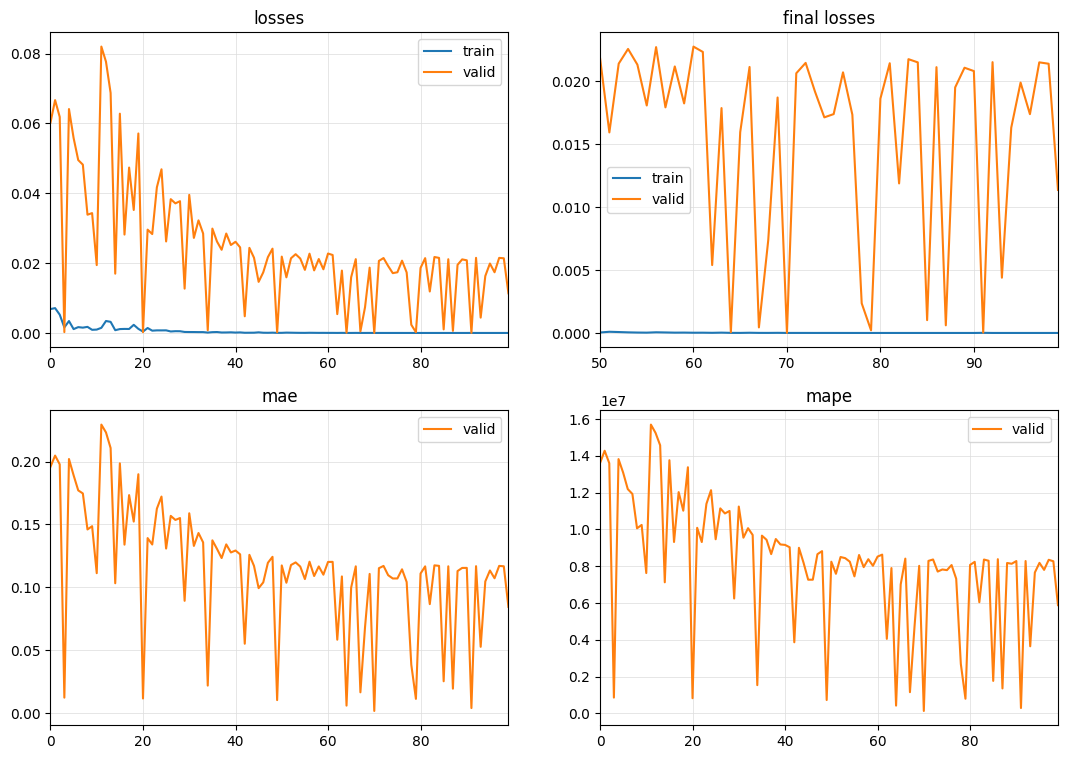

In [13]:
n_epochs=100

learn.fit_one_cycle(n_epoch=n_epochs,lr_max=lr_max)
learn.export('EnerInceptionTime.pt')

In [33]:
fcst_date="2023-07-13 12:00:50"
dates=pd.date_range(start=None,end=fcst_date,periods=config.FCST_HISTORY,freq=config.FREQUENCY)
dates

DatetimeIndex(['2023-07-05 05:00:50', '2023-07-05 06:00:50',
               '2023-07-05 07:00:50', '2023-07-05 08:00:50',
               '2023-07-05 09:00:50', '2023-07-05 10:00:50',
               '2023-07-05 11:00:50', '2023-07-05 12:00:50',
               '2023-07-05 13:00:50', '2023-07-05 14:00:50',
               ...
               '2023-07-13 03:00:50', '2023-07-13 04:00:50',
               '2023-07-13 05:00:50', '2023-07-13 06:00:50',
               '2023-07-13 07:00:50', '2023-07-13 08:00:50',
               '2023-07-13 09:00:50', '2023-07-13 10:00:50',
               '2023-07-13 11:00:50', '2023-07-13 12:00:50'],
              dtype='datetime64[ns]', length=200, freq='H')

In [34]:
new_df=df[df[config.ENERGY_DATETIME].isin(dates)].reset_index(drop=True)
new_df

parameter_timestamp  current_ir  electrical_energy  frequency  power  \
0   2023-07-05 05:00:50         0.0              140.0       50.0  130.0   
1   2023-07-05 06:00:50         0.0              140.0       50.0  130.0   
2   2023-07-05 07:00:50         0.0              140.0       50.0  130.0   
3   2023-07-05 08:00:50         0.0              140.0       50.0  130.0   
4   2023-07-05 09:00:50         0.0              140.0       50.0  130.0   
..                  ...         ...                ...        ...    ...   
195 2023-07-13 08:00:50         0.0              140.0       50.0  130.0   
196 2023-07-13 09:00:50         0.0              140.0       50.0  130.0   
197 2023-07-13 10:00:50         0.0              140.0       50.0  130.0   
198 2023-07-13 11:00:50         0.0              140.0       50.0  130.0   
199 2023-07-13 12:00:50         0.0              140.0       50.0  130.0   

     powerfactor  pressure  temperature  voltage_vb  voltage_vr  voltage_vy  
0            1.0      1.06         28.0         0.0         0.0         0.0  
1            1.0      1.06         28.0         0.0         0.0         0.0  
2            1.0      1.06         28.0         0.0         0.0         0.0  
3            1.0      1.06         28.0         0.0         0.0         0.0  
4            1.0      1.06         28.0         0.0         0.0         0.0  
..           ...       ...          ...         ...         ...         ...  
195          1.0      1.06         28.0         0.0         0.0         0.0  
196          1.0      1.06         28.0         0.0         0.0         0.0  
197          1.0      1.06         28.0         0.0         0.0         0.0  
198          1.0      1.06         28.0         0.0         0.0         0.0  
199          1.0      1.06         28.0         0.0         0.0         0.0  

[200 rows x 11 columns]

In [35]:
from tsai.inference import load_learner

predict=load_learner('models/EnerInceptionTime.pt')
new_df=predict.transform(new_df)

new_df

Initial memory usage: 10.29 KB  
Final memory usage  : 9.11 KB    (-11.4%)


parameter_timestamp  current_ir  electrical_energy  frequency     power  \
0   2023-07-05 05:00:50   -0.035283          -0.023987        0.0 -0.022731   
1   2023-07-05 06:00:50   -0.035283          -0.023987        0.0 -0.022731   
2   2023-07-05 07:00:50   -0.035283          -0.023987        0.0 -0.022731   
3   2023-07-05 08:00:50   -0.035283          -0.023987        0.0 -0.022731   
4   2023-07-05 09:00:50   -0.035283          -0.023987        0.0 -0.022731   
..                  ...         ...                ...        ...       ...   
195 2023-07-13 08:00:50   -0.035283          -0.023987        0.0 -0.022731   
196 2023-07-13 09:00:50   -0.035283          -0.023987        0.0 -0.022731   
197 2023-07-13 10:00:50   -0.035283          -0.023987        0.0 -0.022731   
198 2023-07-13 11:00:50   -0.035283          -0.023987        0.0 -0.022731   
199 2023-07-13 12:00:50   -0.035283          -0.023987        0.0 -0.022731   

     powerfactor  pressure  temperature  voltage_vb  voltage_vr  voltage_vy  
0       0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
1       0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
2       0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
3       0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
4       0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
..           ...       ...          ...         ...         ...         ...  
195     0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
196     0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
197     0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
198     0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  
199     0.028391  0.025968     0.017718   -0.042337   -0.036645   -0.042326  

[200 rows x 11 columns]

In [28]:
x_feat=new_df.columns[1:]
new_x,__=prepare_forecasting_data(new_df,fcst_history=fcst_history,fcst_horizon=0,x_vars=x_vars,y_vars=y_vars)
new_x.shape

(1, 10, 200)

In [29]:
new_scaled_preds, *_ = learn.get_X_preds(new_x)

new_scaled_preds=to_np(new_scaled_preds).swapaxes(1,2).reshape(-1,len(y_vars))
dates=pd.date_range(start=fcst_date, periods=fcst_horizon+1,freq='1H')[1:]
preds_df=pd.DataFrame(dates,columns=[datetime_col])
preds_df.loc[:, y_vars]=new_scaled_preds
preds_df=learn.inverse_transform(preds_df)

preds_df

parameter_timestamp  current_ir  electrical_energy  frequency       power  \
0   2023-07-13 13:00:50    0.001096         141.234711       50.0  127.811417   
1   2023-07-13 14:00:50    0.004344         139.727371       50.0  130.631073   
2   2023-07-13 15:00:50   -0.004954         138.812119       50.0  129.651535   
3   2023-07-13 16:00:50    0.001051         140.470779       50.0  127.855476   
4   2023-07-13 17:00:50   -0.000661         138.916412       50.0  131.405380   
..                  ...         ...                ...        ...         ...   
163 2023-07-20 08:00:50    0.001771         138.384018       50.0  129.857925   
164 2023-07-20 09:00:50    0.000068         140.150238       50.0  130.151627   
165 2023-07-20 10:00:50    0.000186         139.940826       50.0  128.701904   
166 2023-07-20 11:00:50   -0.007508         140.450912       50.0  128.328964   
167 2023-07-20 12:00:50    0.002726         139.368546       50.0  130.120071   

     powerfactor  pressure  temperature  voltage_vb  voltage_vr  voltage_vy  
0       1.001055  1.057300    27.986296   -1.917876    0.576301   -0.040845  
1       1.000224  1.060515    28.029724   -1.008769    0.131339   -0.803190  
2       0.999673  1.060144    27.930075   -1.564345   -0.319494   -0.133825  
3       1.000330  1.059224    27.881578    0.151097    0.639718   -0.659135  
4       1.000780  1.062929    28.005365   -1.031228   -1.475980   -0.234166  
..           ...       ...          ...         ...         ...         ...  
163     0.999521  1.062028    27.924028    0.229666   -1.267485   -1.298952  
164     0.999780  1.061307    27.996088   -1.717520   -1.180167    0.026794  
165     0.999633  1.060397    28.017605   -1.705875   -0.438039    0.817327  
166     1.000353  1.061629    27.954876   -1.840141   -0.302064   -1.691164  
167     1.000274  1.060468    27.879194   -0.467109   -1.259444   -1.089212  

[168 rows x 11 columns]